In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

## 构建数据

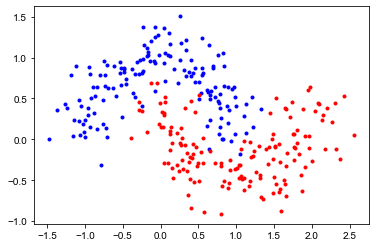

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=300, noise=0.20, random_state=42)

plt.plot(X[:,0][y==0],X[:,1][y==0],'b.')
plt.plot(X[:,0][y==1],X[:,1][y==1],'r.')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [41]:
# 决策边界函数
from matplotlib.colors import ListedColormap
def plot_decision_boundary(clf, X, y, feature_names=["x","y"], target_names=[0,1],
                           axis=[-2, 4, -2, 3],legend=True, alpha=0.5,
                           plot_training=True, title='Decision boundary'):
    custom_cmap = ListedColormap(['y','#9898ff','#a0faa0'])
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#505d50'])
    
    x1s = np.linspace(axis[0],axis[1],100)
    x2s = np.linspace(axis[2],axis[3],100)
    x1,x2 = np.meshgrid(x1s,x2s)
    #print(x1.shape)
    
    X_new = np.c_[x1.flatten(), x2.flatten()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1,x2,y_pred,cmap=custom_cmap,alpha=0.3)
    plt.contour(x1,x2,y_pred,cmap=custom_cmap2,alpha=0.8)
    
    if plot_training:
        for index,name in enumerate(target_names):
            plt.scatter(X[:,0][y==index], X[:,1][y==index],label=name, alpha=alpha)
    if legend:
        plt.legend()
            
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)

## 原理
用 svm ，在一步步更新权重参数的过程中来模拟 adaboost原理

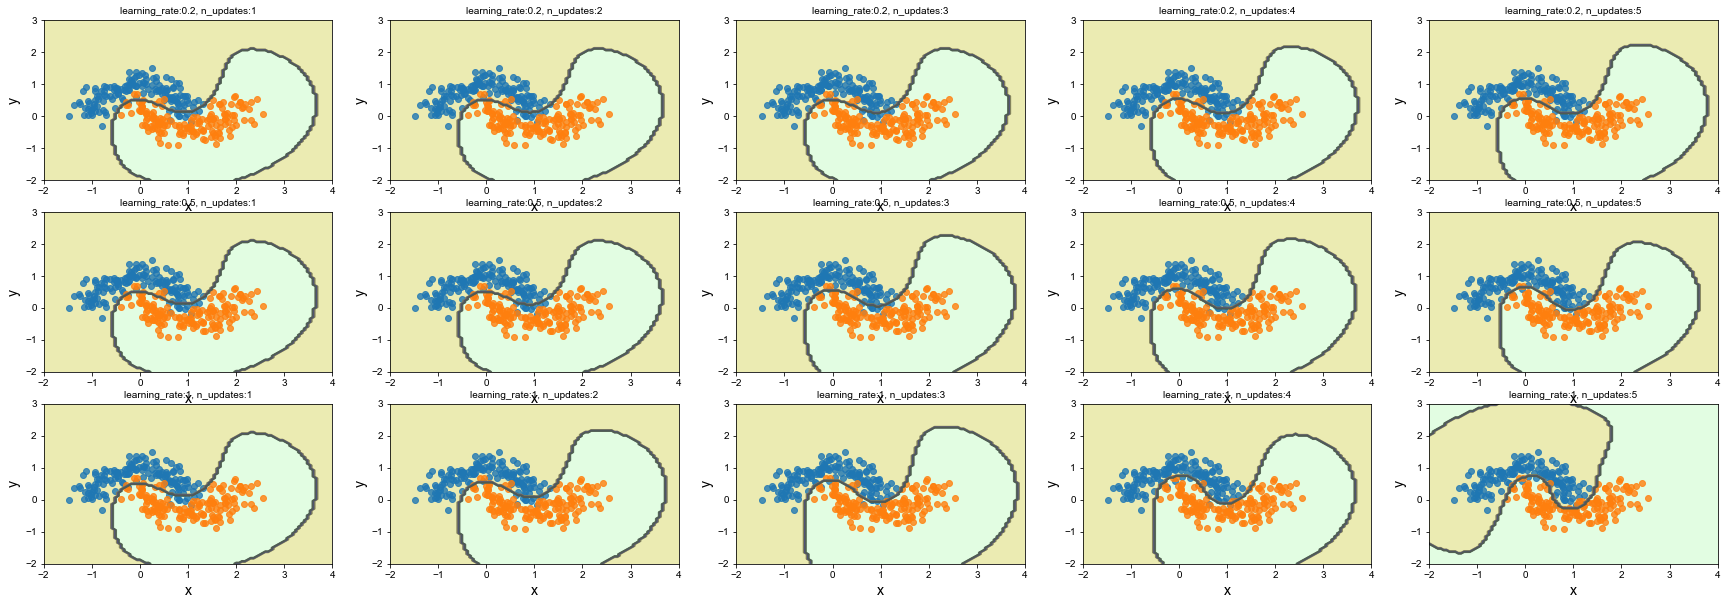

In [45]:
plt.rcParams["axes.titlesize"] = 10
from sklearn.svm import SVC
n_trains = len(X_train)
learning_rate_list = [0.2,0.5,1]

n_updates = 5 # 权重更新次数
weight = np.ones(n_trains) # 初始权重

plt.figure(figsize=(30,10))

rows = len(learning_rate_list)
k=1
for learning_rate in learning_rate_list:
    weight = np.ones(n_trains) # 初始权重重置
    for i in range(n_updates):
        svm_clf = SVC(kernel='rbf', random_state=0, C=0.5)
        svm_clf.fit(X_train, y_train,sample_weight=weight)
        y_pred = svm_clf.predict(X_train)
        weight[y_pred != y_train] *= (1+learning_rate)
        
        # plot
        plt.subplot(rows,n_updates,k)
        #print(rows, n_updates, k)
        
        title = "learning_rate:{}, n_updates:{}".format(learning_rate, i+1)
        plot_decision_boundary(svm_clf, X, y, legend=False, alpha=0.8, title=title)
        k += 1
plt.show()

## Adaboost

In [48]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [58]:
ada_clf = AdaBoostClassifier(
    base_estimator = RandomForestClassifier(n_estimators=10,
                                            max_samples=150,
                                            max_depth=3,
                                            max_leaf_nodes=6,
                                            min_samples_split=5,
                                            n_jobs=-1),
    n_estimators = 100,
    learning_rate = 0.5,
    random_state=0,
)
ada_clf.fit(X,y)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=3,
                                                         max_leaf_nodes=6,
                                                         max_samples=150,
                                                         min_samples_split=5,
                                                         n_estimators=10,
                                                         n_jobs=-1),
                   learning_rate=0.5, n_estimators=100, random_state=0)

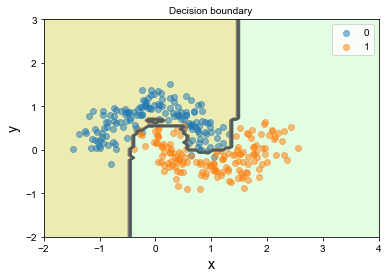

In [59]:
plot_decision_boundary(ada_clf, X, y)